# Lista de exercícios cálculo numérico

### Bibliotecas:

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from functools import reduce
import div_diff, fin_diff, lagrange

## EXERCÍCIOS SOBRE SISTEMAS LINEARES

### 1. Dada a função $f(x) = x^2-2x+1$:

* a) Faça uma tabela de valores de $x$ e $y$. Use $x = \{0,2,4\}$.
* b) Interpole $x=1,5$ usando Lagrange.
* c) Interpole $x=1,5$ usando Diferenças Divididas.
* d) Interpole $x=1,5$ usando Diferenças Finitas.
* e) Compare os resultados obtidos nas letras (b),(c) e (d) com $f(1,5)$.
* f) Explique os resultados da letra (e).

In [2]:
f = lambda x : x**2 - 2*x + 1

print("a)")
display(Markdown(f"""
| x |  f(x)  |
|---|--------|
| 0 | {f(0)} |
| 2 | {f(2)} |
| 4 | {f(4)} |
"""))

xi = [0,2,4]
yi = [1,1,9]

print("b) Lagrange:", lagrange.solve(1.5,xi,yi))
print("c) Diferenças divididas:", div_diff.solve(1.5,xi,yi))
print("d) Diferenças finitas:", fin_diff.solve(1.5,xi,yi))
print("e) f(1,5):", f(1.5))

print("f) Os valores interpolados e exatos são iguais.")

a)



| x |  f(x)  |
|---|--------|
| 0 | 1 |
| 2 | 1 |
| 4 | 9 |


b) Lagrange: 0.25
c) Diferenças divididas: 0.25
d) Diferenças finitas: 0.25
e) f(1,5): 0.25
f) Os valores interpolados e exatos são iguais.


### 2. A Tabela abaixo apresenta a condutividade térmica da água ($k_f$) em função da temperatura. Calcule a condutividade para $T = 310 K$:

|$T (K)$|295|300|320|340|
|:-----|---|---|---|---|
|$k_f(\frac{W}{mK})x10^3$|606|613|640|660|

* a) Usando interpolação linear.
* b) Usando interpolação por diferenças divididas. Compare os resultados.

In [3]:
xi = [295,300,320,340]
yi = [606,613,640,660]
print("a) Lagrange:", lagrange.solve(310,xi,yi))
print("b) Diferenças divididas:", div_diff.solve(310,xi,yi))

a) Lagrange: 626.925
b) Diferenças divididas: 626.925


### 3. Dada a função $f(x) = e^{2x}$ :

* a) Faça uma tabela de valores de $x$ e $y$. Use $x = \{0,1,2,3,4\}$.
* b) Interpole $x = 2,1$ usando Lagrange.
* c) Interpole $x = 2,1$ usando Diferenças Divididas.
* d) Interpole $x = 2,1$ usando Diferenças Finitas.
* e) Compare os resultados obtidos nas letras (b), (c) e (d) com $f(2,1)$.
* f) Explique os resultados da letra (e). (Compare com o Ex.1)

In [4]:
f = lambda x : np.e**(2*x)

print("a)")
display(Markdown(f"""
| x |  f(x)  |
|---|--------|
| 0 | {f(0)} |
| 1 | {f(1)} |
| 2 | {f(2)} |
| 3 | {f(3)} |
| 4 | {f(4)} |
"""))

xi = [   0,   1,   2,   3,   4]
yi = [f(0),f(1),f(2),f(3),f(4)]

print("b) Lagrange:", lagrange.solve(2.1,xi,yi))
print("c) Diferenças divididas:", div_diff.solve(2.1,xi,yi))
print("d) Diferenças finitas:", fin_diff.solve(2.1,xi,yi))
print("e) f(1,5):", f(2.1))

print("f) Os valores interpolados e exatos não são iguais devida a natureza da função original não ser polinomial.")

a)



| x |  f(x)  |
|---|--------|
| 0 | 1.0 |
| 1 | 7.3890560989306495 |
| 2 | 54.59815003314423 |
| 3 | 403.428793492735 |
| 4 | 2980.957987041727 |


b) Lagrange: 57.17090828520437
c) Diferenças divididas: 57.17090828520437
d) Diferenças finitas: 57.17090828520436
e) f(1,5): 66.68633104092514
f) Os valores interpolados e exatos não são iguais devida a natureza da função original não ser polinomial.


### 4. A velocidade do som na água varia com a temperatura. Usando os valores da tabela, determinar o valor aproximado da velocidade do som na água a $100^oC$.

|Temperatura ($^oC$)|86|93,3|98,9|104,4|110|
|:------------------|:-:|:--:|:--:|:---:|:-:|
|Velocidade (m/s)|1552|1548|1544|1538|1532|

In [5]:
xi = [86,   93.3, 98.9, 104.4,  110]
yi = [1552, 1548, 1544,  1538, 1532]

print(div_diff.solve(100,xi,yi))

1542.9392473388307


### 5. Dada a função $f(x) = 1/(1+x^2)$ (use o computador)

* a) Faça uma tabela de valores de $x$ e $y$. Use $x = \{-4,-3,-2,-1,0,1,2,3,4\}$.
* b) Faça um gráfico de $f(x)$ e da interpolação com diferenças finitas. Compare as curvas.
* c) Verifique se a interpolação reproduz razoavelmente os pontos de $f(x)$.

a)



| x |  f(x)  |
|---|--------|
| -4 | 0.058823529411764705 |
| -3 | 0.1 |
| -2 | 0.2 |
| -1 | 0.5 |
| 0 | 1.0 |
| 1 | 0.5 |
| 2 | 0.2 |
| 3 | 0.1 |
| 4 | 0.058823529411764705 |


b)


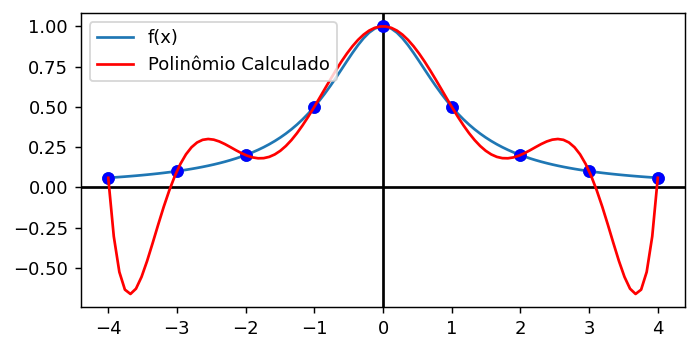

c) Os resultados reproduzem perfeitamente para os pontos conhecidos, pela definição dos métodos de interpolação. Resultados próximos aos pontos de [-3,3] tem um resultado rasoavelmente satisfatório, mas os pontos de [-4,-3] e [3,4] ficam com uma disparidade razoavelmente grande.

In [6]:
f = lambda x : 1/(1+x**2)

xi = [-4,-3,-2,-1,0,1,2,3,4]
yi = [f(x) for x in xi]

print("a)")
display(Markdown(''.join(["""
| x |  f(x)  |
|---|--------|
"""]+[f"| {x} | {y} |\n" for x,y in zip(xi,yi)])))

print("b)")

h = xi[1]-xi[0]
z = lambda x : (x - xi[0])/h
linoperator = lambda n,i : yi[i] if n==0 else linoperator(n-1,i+1) - linoperator(n-1,i)
polnewton = lambda x : yi[0]+sum((linoperator(i,0)/np.math.factorial(i))*reduce(lambda a,b : a*b, [z(x)-j for j in range(i)], 1) for i in range(1,len(xi)))

plt.figure(figsize=(6, 3), dpi=130)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

xarr = np.linspace(xi[0],xi[-1],100)
plt.plot(xarr,f(xarr), label="f(x)")
plt.scatter(xi, yi)

for px,py in zip(xi,yi) : plt.plot(px, py, 'bo')

plt.plot(xarr,polnewton(xarr),color='red', label="Polinômio Calculado")

plt.legend(loc="upper left")

plt.show()

display(Markdown("c) Os resultados reproduzem perfeitamente para os pontos conhecidos, pela definição dos métodos de interpolação. Resultados próximos aos pontos de [-3,3] tem um resultado rasoavelmente satisfatório, mas os pontos de [-4,-3] e [3,4] ficam com uma disparidade razoavelmente grande."))